In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# SOCAR 

In [2]:
# 데이터 읽고 컬럼명 바꾸기

In [6]:
data = pd.read_csv('/Users/sunny/fastcampus/projects/ML-socar/ML/2_insurance_fraud_detect_data/insurance_fraud_detect_data.csv')
data.head()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0


In [7]:
data.columns

Index(['fraud_YN', 'car_model', 'sharing_type', 'age_group',
       'has_previous_accident', 'cumulative_use_count', 'b2b',
       'accident_ratio', 'pf_type', 'socarpass', 'socarsave', 'start_hour',
       'duration', 'accident_hour', 'repair_cost', 'insure_cost',
       'accident_location', 'car_part1', 'car_part2', 'repair_cnt',
       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN',
       'total_prsn_cnt', 'test_set'],
      dtype='object')

In [13]:
data.columns=["fraud","c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12",
           "c13","c14","c15","c16","c17","c18","c19","c20","c21","c22","c23","c24"]

In [230]:
# 바뀐 컬럼명의 데이터를 저장 
data.to_csv("ins_fraud.csv", encoding="utf-8-sig", index=False)

In [212]:
len(data.columns)

25

In [12]:
data.isnull().sum()

fraud_YN                 0
car_model                0
sharing_type             0
age_group                0
has_previous_accident    0
cumulative_use_count     0
b2b                      0
accident_ratio           0
pf_type                  0
socarpass                0
socarsave                0
start_hour               0
duration                 0
accident_hour            0
repair_cost              0
insure_cost              0
accident_location        0
car_part1                0
car_part2                0
repair_cnt               0
acc_type1                0
insurance_site_aid_YN    0
police_site_aid_YN       0
total_prsn_cnt           0
test_set                 0
dtype: int64

In [10]:
# 결측치가 없다 

In [14]:
data

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0


In [13]:
'''
fraud:1 if fraud 0 if not 
c1 '경형','소형','소형SUV' : 1 / '준중형','준중형SUV','중형' : 2 / '대형','승합','준대형','중형SUV' : 3 / '수입' : 4 / 'EV','RV' : 5
c2부름: 1, 쏘카: 0 (?)
c3 age 21 : 1 / 23 : 2 / 27 : 3 / 31 : 4 / 41 : 5
c4 누적 사고 유무 : 1 if yes, 0 if not
c5 누적 대여 횟수 1 : 1 / (2,3,4,5) : 2 / (6,7,8,9,10) : 3 / 10+ : 4 / else 0
c6 법인이용 개인 고객 = 0 / 법인 = 1 / 법인 구성원 = 2
c7 과실율 unique = 100,   0,  90,  55,  30,  80,  40,  10,  70,  20,  60,  85,  75, 50,  15,  65,  25
c8 보험료 타입 선택 PF5 : 1 / PF30 : 2 / PF70 : 3 / else 0
c9 쏘카패스: yes 1 no 0
c10 쏘카세이브: yes 1 no 0 
c11 이용시작시간: (0,1,2,3,4,21,22,23) : 1 / (17,18,19,20) : 2 / (5,6,7) : 3 / (8,9,10) : 4 / (11,12,13) : 5 / (14,15,16) : 6
c12 대여기간 (2,3,4,5) : 1 / (6,7,8,9) : 2 / (10 =< x <=36) : 3 / (36+) : 4 / (0,1) : 5
c13 사고시각 (0,1,2,3,4,21,22,23) : 1 / (17,18,19,20) : 2 / (5,6,7) : 3 / (8,9,10) : 4 / (11,12,13) : 5 / (14,15,16) : 6 / else -1
c14 차량수리비용
c15 보험손해비용
c16 사고위치: 0주차장 1일반도로 2이면도로 3고속도로 4쏘카존 5확인불가
c17 전면 손상 if(a1 = 1, 1, 0) a1, -- 앞범퍼
c18 후면 손상 if(a10 = 1, 1, 0) a10, -- 뒷범퍼
c19 수리 부위 갯수
c20 사고타입: 사고 유형1 : 차대인(10) 차대차(20) 차량단독(30) 보행중(40) 자전거(50) 기타(99)
c21 보험사 현장출동 유무 Yes 1 no 2 else 0 
c22 경찰 현장출동 유무 1 미신고 / 2 신고 / else 0
c23 우리차 탑승 인원 ("0","1","2","3","4"), 5이상: 5, 미확인=-1 
c24 test_set
'''

"\nfraud_YN:1 if fraud 0 if not \n\ncar_model 차종: \n    '경형','소형','소형SUV' : 1\n    '준중형','준중형SUV','중형' : 2\n    '대형','승합','준대형','중형SUV' : 3\n    '수입' : 4\n    'EV','RV' : 5\n\nsharing_type:부름 / 쏘카\n    부름: 1, 쏘카: 0 (?)\n     \nage_group 연령대\n    21 : 1\n    23 : 2\n    27 : 3\n    31 : 4\n    41 : 5\n\nhas_previous_accident 누적 사고 유무 : 1 if yes, 0 if not\n    \ncumulative_use_count 누적 대여 횟수\n    1 : 1\n    (2,3,4,5) : 2\n    (6,7,8,9,10) : 3\n    10+ : 4\n    else 0\n    \nb2b 법인이용\n    개인 고객 = 0\n    법인 = 1\n    법인 구성원 = 2\n\naccident_ratio 과실율\n    unique = 100,   0,  90,  55,  30,  80,  40,  10,  70,  20,  60,  85,  75, 50,  15,  65,  25\n    \npf_type 보험료 타입 선택 (PF5, PF30, PF70)\n    PF5 : 1\n    PF30 : 2\n    PF70 : 3\n    else 0\n\nsocarpass 쏘카패스: yes 1 no 0\n\nsocarsave 쏘카세이브: yes 1 no 0 \n    \nstart_hour 이용시작시간: \n    (0,1,2,3,4,21,22,23) : 1\n    (17,18,19,20) : 2\n    (5,6,7) : 3\n    (8,9,10) : 4\n    (11,12,13) : 5\n    (14,15,16) : 6\n\nduration 대여기간\n    (2,3,4,5) : 1\n  

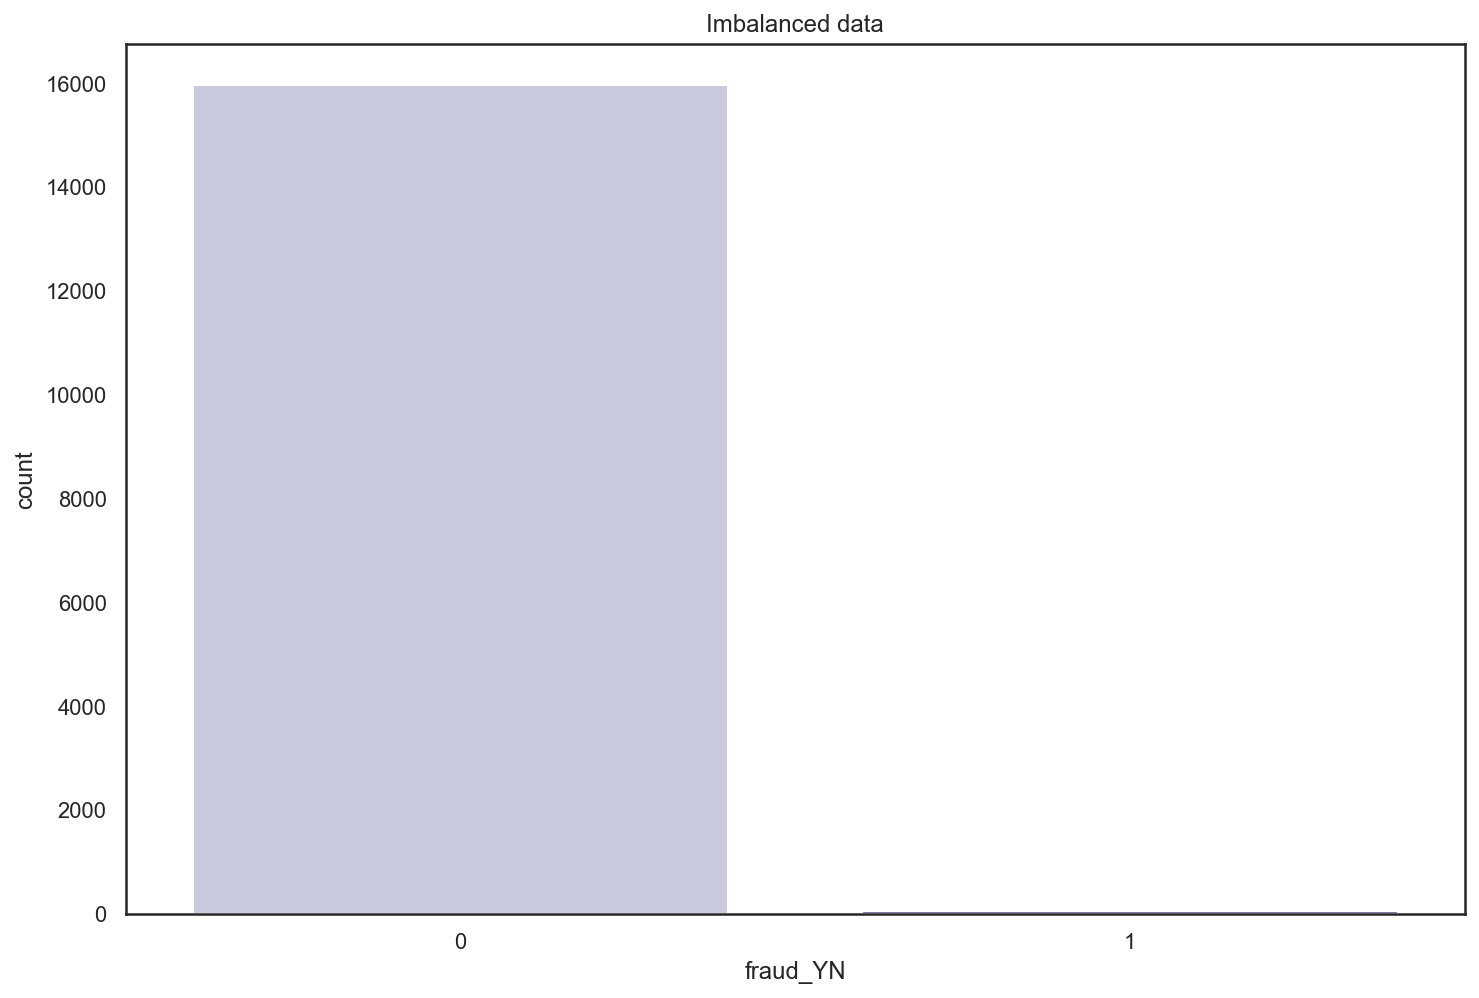

In [14]:
plt.figure(figsize=(12, 8))
plt.title('Imbalanced data')
sns.countplot(data["fraud_YN"], palette="Purples")
plt.show()

In [ ]:
# EDA 진행  - on a separate workbook 

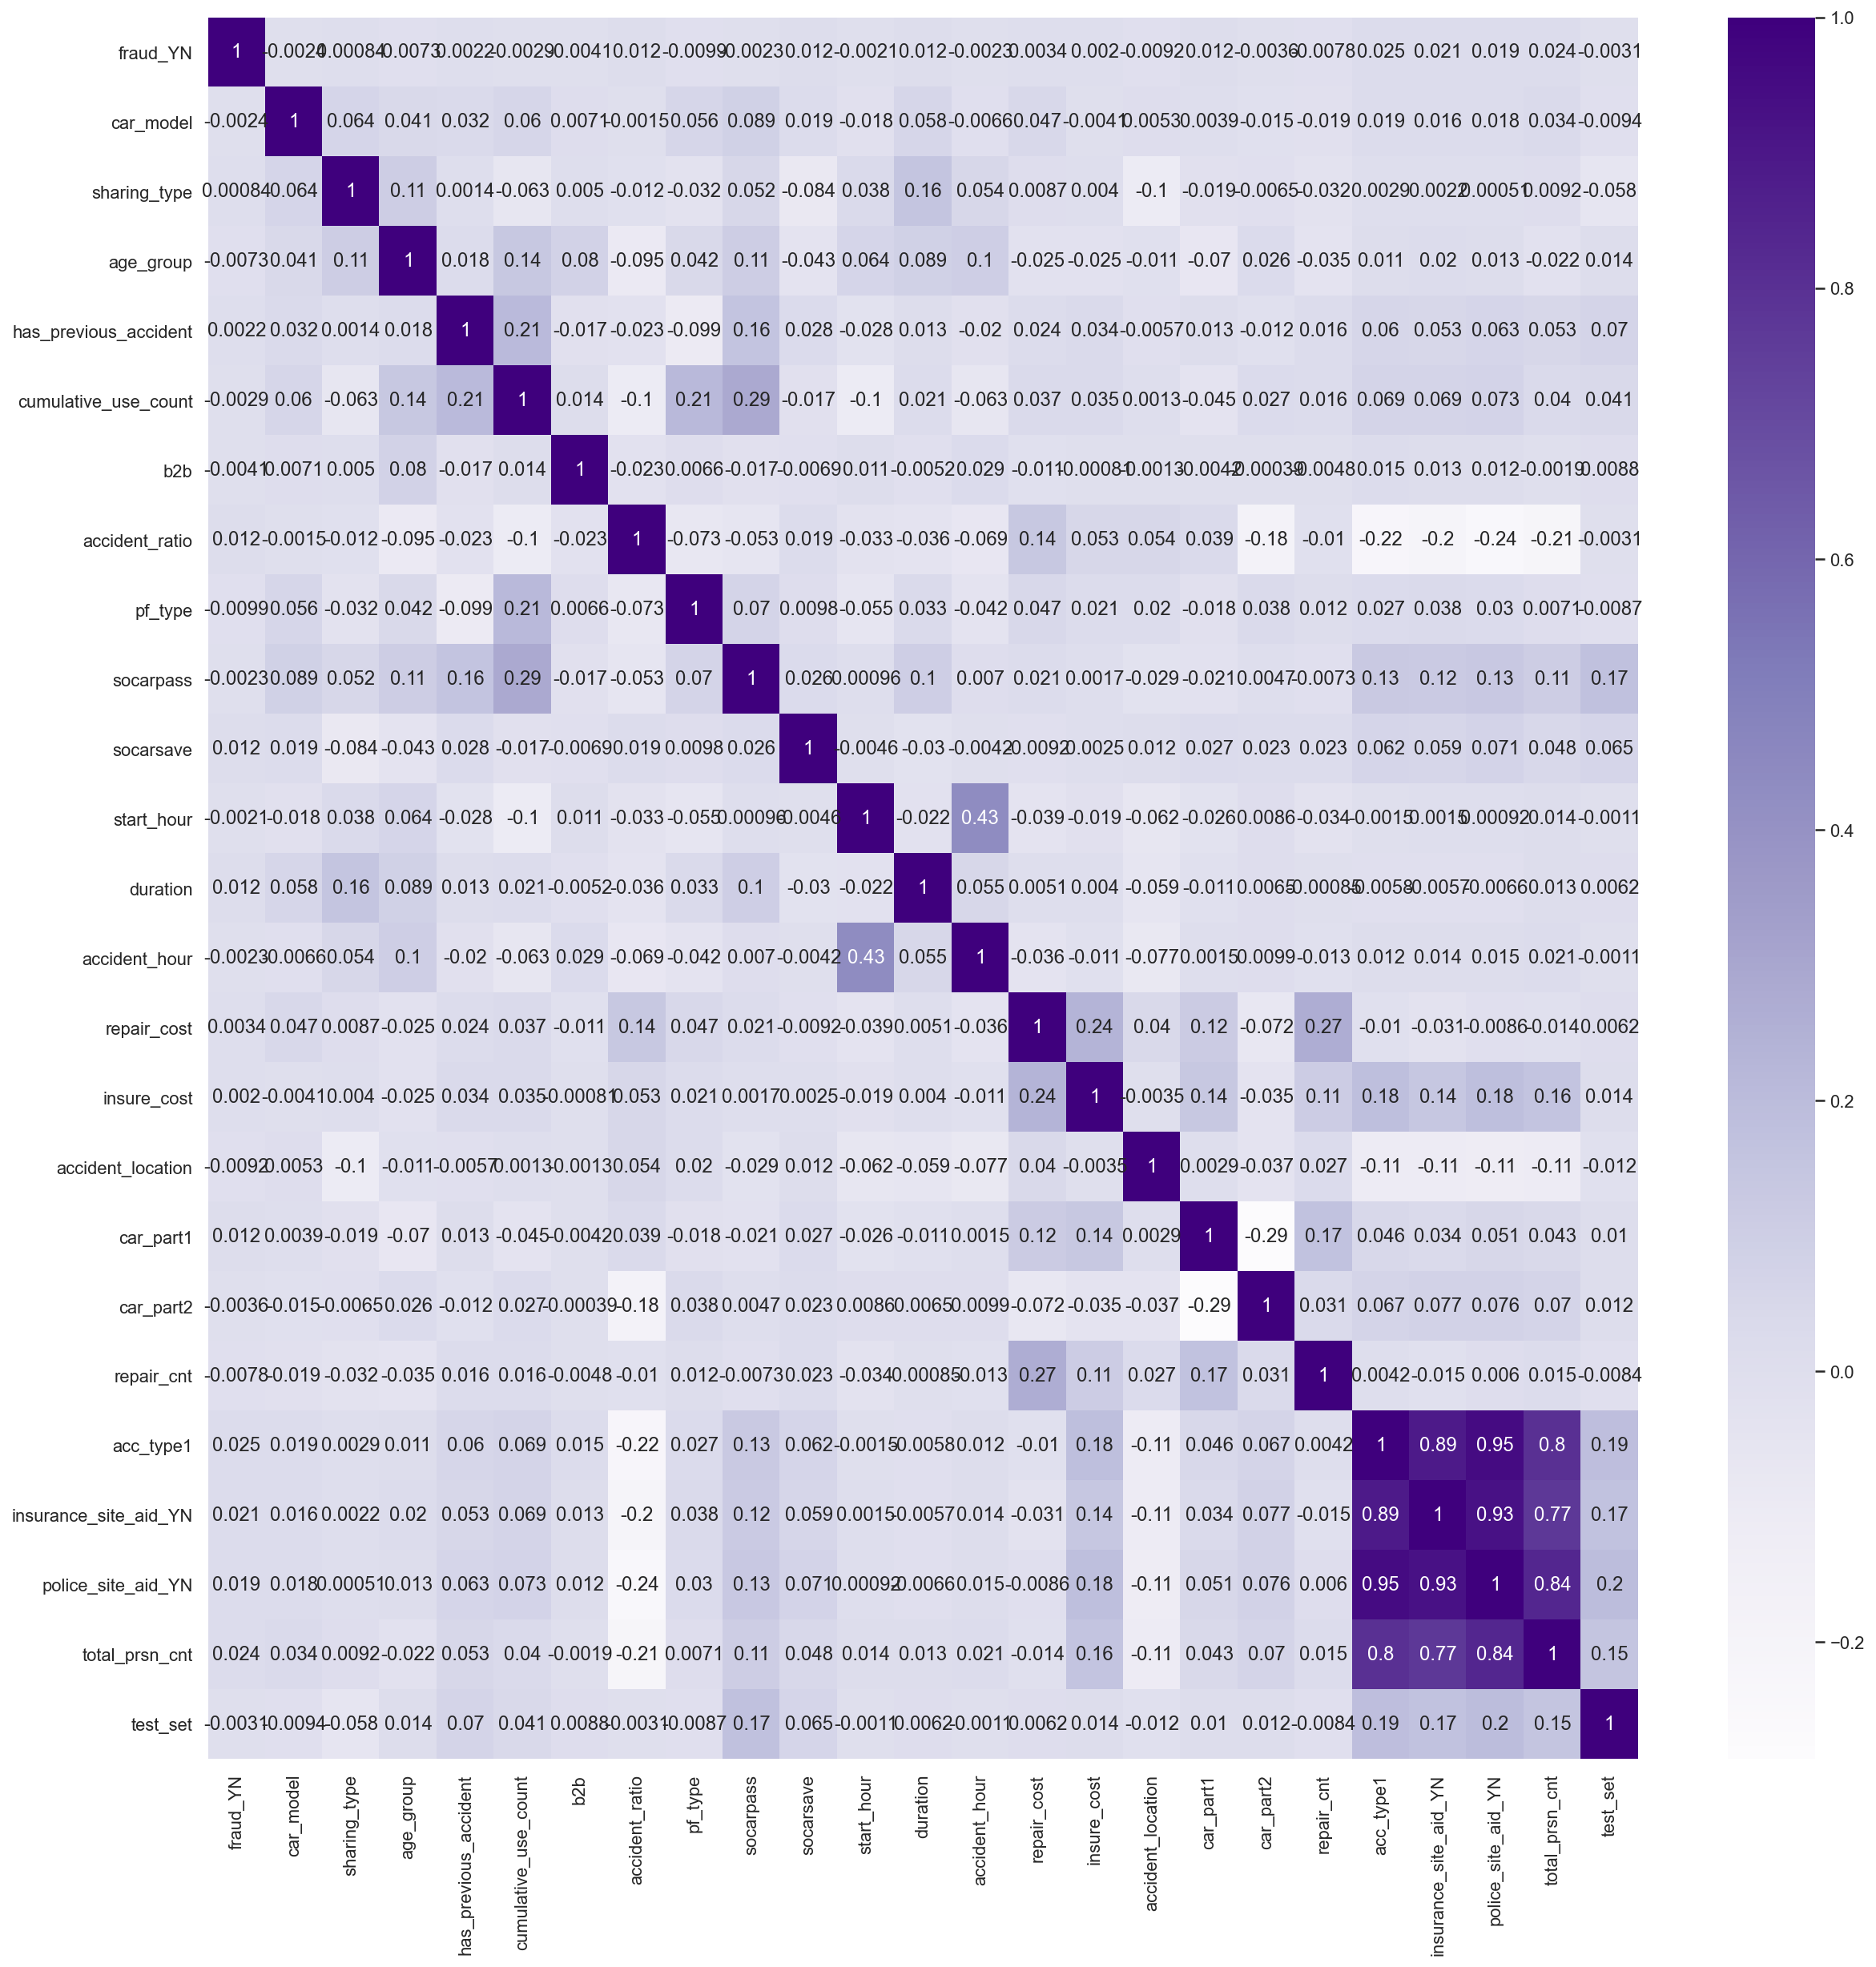

In [79]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap="Purples", annot=True)
plt.show()

# UNDERSAMPLING & OVERSAMPLING

### RandomUnderSampler

In [16]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [17]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [24]:
#from collections import Counter
#print('Resampled dataset shape %s' % Counter(y))

In [18]:
from sklearn.model_selection import train_test_split
 
X = X_res
y = y_res
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

57
25
57
25


In [63]:
len(X_res), len(y_res)

(82, 82)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.72
precision 0.875
recall 0.5384615384615384
f1 0.6666666666666667


### Tomek’s link method

In [21]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [22]:
from imblearn.under_sampling import TomekLinks
tom = TomekLinks()
X_tom, y_tom = tom.fit_resample(X, y)

In [61]:
len(X_tom), len(y_tom)

(15977, 15977)

In [23]:
from sklearn.model_selection import train_test_split
 
X = X_tom
y = y_tom
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11183
4794
11183
4794


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9974968710888611
precision 0.0
recall 0.0
f1 0.0


### Condensed Nearest Neighbour

In [25]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [27]:
from imblearn.under_sampling import CondensedNearestNeighbour
cnn = CondensedNearestNeighbour(random_state=42)
X_cnn, y_cnn = cnn.fit_resample(X, y)

In [28]:
from sklearn.model_selection import train_test_split
 
X = X_cnn
y = y_cnn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

300
129
300
129


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)

# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9069767441860465
precision 0.0
recall 0.0
f1 0.0


### One Sided Selection

In [31]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [32]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=0)
X_oss, y_oss = oss.fit_resample(X, y)

In [64]:
len(X_oss), len(y_oss)

(15818, 15818)

In [33]:
from sklearn.model_selection import train_test_split
 
X = X_oss
y = y_oss
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11072
4746
11072
4746


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9972608512431521
precision 0.0
recall 0.0
f1 0.0


### Edited Nearest Neighbours

In [35]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [36]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(kind_sel="all", n_neighbors=5)
X_enn, y_enn = enn.fit_resample(X, y)

In [66]:
len(X_enn), len(y_enn)

(15818, 15818)

In [37]:
from sklearn.model_selection import train_test_split
 
X = X_enn
y = y_enn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11072
4746
11072
4746


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)

 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9974715549936789
precision 0.0
recall 0.0
f1 0.0


### Neighbourhood Cleaning Rule

In [39]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [40]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(kind_sel="all", n_neighbors=5)
X_ncr, y_ncr = ncr.fit_resample(X, y)

In [67]:
len(X_ncr), len(y_ncr)

(15795, 15795)

In [41]:
from sklearn.model_selection import train_test_split
 
X = X_ncr
y = y_ncr
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

11056
4739
11056
4739


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9974678202152353
precision 0.0
recall 0.0
f1 0.0


## 복합 샘플링

- SMOTEENN: SMOTE + ENN
- SMOTETomek: SMOTE + Tomek

In [43]:
from imblearn.over_sampling import *

### SMOTEENN

In [44]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [45]:
from imblearn.combine import *
stn = SMOTEENN(random_state=0)
X_stn, y_stn = stn.fit_resample(X, y)

In [68]:
len(X_stn), len(y_stn)

(20195, 20195)

In [46]:
from sklearn.model_selection import train_test_split
 
X = X_stn
y = y_stn
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

14136
6059
14136
6059


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.9976893876877373
precision 0.9987220447284345
recall 0.9968112244897959
f1 0.997765719757421


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2919,    4],
       [  10, 3126]])

In [49]:
y = data["fraud"]

In [50]:
fraud = data.drop("fraud", 1)

In [51]:
y_pred = forest.predict(fraud)
confusion_matrix(y, y_pred)

array([[15932,    27],
       [   16,    25]])

In [52]:
print('정확도 :', metrics.accuracy_score(y, y_pred))

print('precision', metrics.precision_score(y, y_pred))

print('recall', metrics.recall_score(y, y_pred))

print('f1', metrics.f1_score(y, y_pred))

정확도 : 0.9973125
precision 0.4807692307692308
recall 0.6097560975609756
f1 0.5376344086021505


### SMOTETomek

In [53]:
X = data.drop("fraud", 1)
y = data["fraud"]

In [54]:
from imblearn.combine import *
stt = SMOTETomek(random_state=4)
X_stt, y_stt = stt.fit_resample(X, y)

In [69]:
len(X_stt), len(y_stt)

(28206, 28206)

In [55]:
from sklearn.model_selection import train_test_split
 
X = X_stt
y = y_stt
 
# 테스트 데이터 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

19744
8462
19744
8462


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
 
# 학습 진행
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
# 예측
y_pred = forest.predict(X_test)
 
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

print('precision', metrics.precision_score(y_test, y_pred))

print('recall', metrics.recall_score(y_test, y_pred))

print('f1', metrics.f1_score(y_test, y_pred))

정확도 : 0.997754667927204
precision 0.997872340425532
recall 0.9976364925549516
f1 0.9977544025528898


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3224,    5],
       [  14, 3215]])

In [58]:
y = data["fraud"]

In [59]:
fraud = data.drop("fraud", 1)

In [60]:
y_pred = forest.predict(fraud)
confusion_matrix(y, y_pred)

array([[12172,    10],
       [   19,    22]])

In [61]:
print('정확도 :', metrics.accuracy_score(y, y_pred))

print('precision', metrics.precision_score(y, y_pred))

print('recall', metrics.recall_score(y, y_pred))

print('f1', metrics.f1_score(y, y_pred))

정확도 : 0.9976274237094003
precision 0.6875
recall 0.5365853658536586
f1 0.6027397260273972


# OVERSAMPLING

### SMOTE
- Synthetic Minority Oversampling Technique
- sudo pip install imbalanced-learn
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

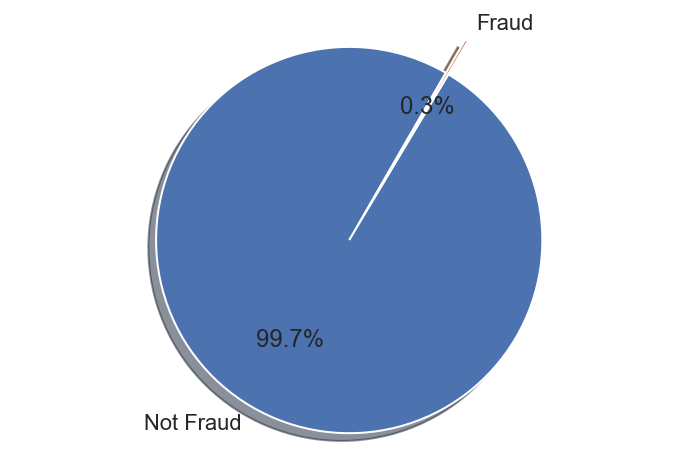

In [75]:
#visualizing in pie chart
labels = 'Not Fraud', 'Fraud'
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(data['fraud_YN'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [76]:
import imblearn 

In [16]:
print(imblearn.__version__)

0.8.0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data["fraud_YN"]

0        0
1        0
2        0
3        0
4        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: fraud_YN, Length: 16000, dtype: int64

In [204]:
X = data.iloc[:,1:]
y = data["fraud_YN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [283]:
from collections import Counter

In [204]:
counter.items()

dict_items([(0, 15959), (1, 41)])

In [197]:
one = data.pivot(columns="fraud_YN")["repair_cost"][1]
zero = data.pivot(columns="fraud_YN")["repair_cost"][0]

### SMOTE

In [152]:
X = data.iloc[:,1:]
y = data["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [153]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [154]:
len(X_smote), len(y_smote)

(31918, 31918)

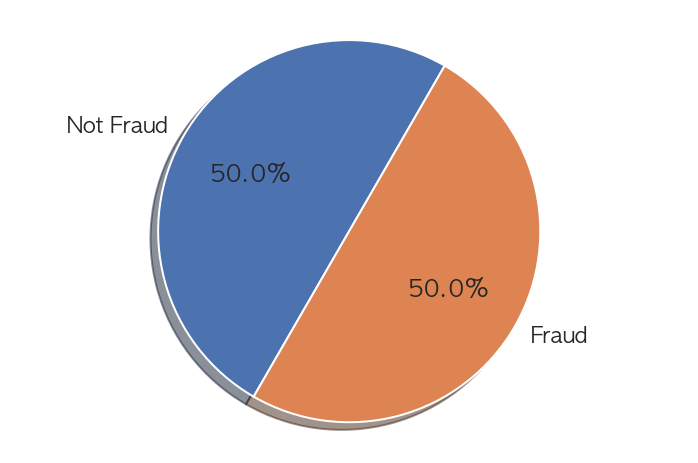

In [155]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y_smote.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_smote, y_smote, test_size = 0.10, random_state = 31)

In [157]:
len(x_train), len(x_test), len(y_train), len(y_test)

(28726, 3192, 28726, 3192)

In [158]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
rfc = RandomForestClassifier(random_state = 4)
rfc.fit(x_train, y_train)
dd = rfc.score(x_test, y_test)
dd

0.9987468671679198

In [159]:
from sklearn.metrics import classification_report
y_preds = rfc.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1562
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      3192
   macro avg       1.00      1.00      1.00      3192
weighted avg       1.00      1.00      1.00      3192



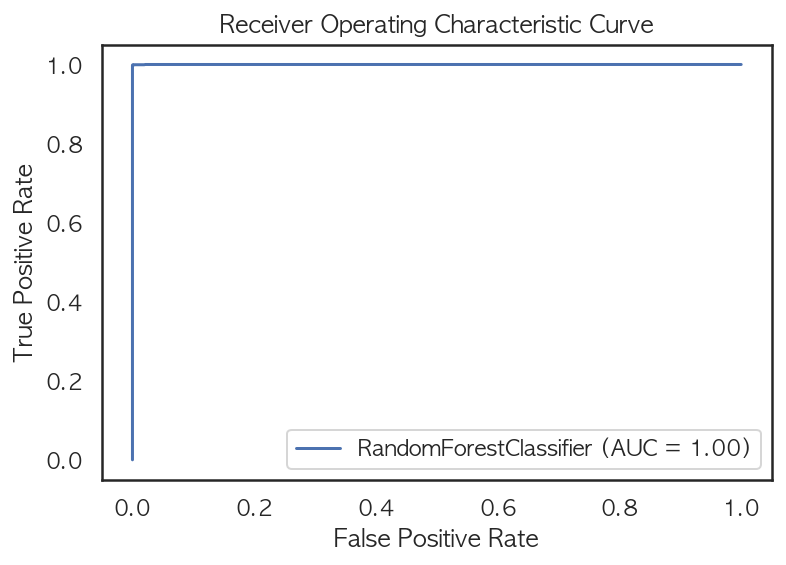

In [160]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

In [162]:
y_pred = rfc.predict(fraud)
confusion_matrix(y, y_pred)

array([[15955,     4],
       [    2,    39]])

In [81]:
#KNeighborsClassifier? 

In [174]:
X = data.iloc[:,1:]
y = data["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
sc = StandardScaler()
X_train = sc.fit_transform(X_smote)
X_test = sc.transform(X_test)

In [177]:
len(X_train), len(y_smote)

(31918, 31918)

In [178]:
X_train.shape, y_smote.shape

((31918, 24), (31918,))

In [179]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_smote)

KNeighborsClassifier(n_neighbors=7)

In [180]:
y_pred = classifier.predict(X_test)

In [183]:
from sklearn.metrics import recall_score
print(f'Recall Score is {recall_score(y_test, y_pred)}')

Recall Score is 0.5263157894736842


In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3181
           1       0.10      0.53      0.16        19

    accuracy                           0.97      3200
   macro avg       0.55      0.75      0.57      3200
weighted avg       0.99      0.97      0.98      3200



In [149]:
## applying other models
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []

models.append(("Random Forest Classifier: ", RandomForestClassifier()))
models.append(("Decision Tree Classifier: ", DecisionTreeClassifier()))
models.append(("AdaBoost Classifier: " , AdaBoostClassifier()))
models.append(("Gradient Boosting Classifier: ", GradientBoostingClassifier()))
models.append(("Logistic Regression: ", LogisticRegression()))

In [151]:
from sklearn.model_selection import KFold, cross_val_score


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_test, y_smote,
                                cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    model = model.fit(X_train, y_smote)
    y_preds = model.predict(X_test)

    print(name, cv_results.mean(), cv_results.std())
    print(classification_report(y_test, y_preds)) 

ValueError: Found input variables with inconsistent numbers of samples: [3200, 31918]

### SMOTEENN

In [77]:
X = data.iloc[:,1:]
y = data["fraud_YN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [45]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
X_somteenn, y_somteenn = sme.fit_resample(X, y)

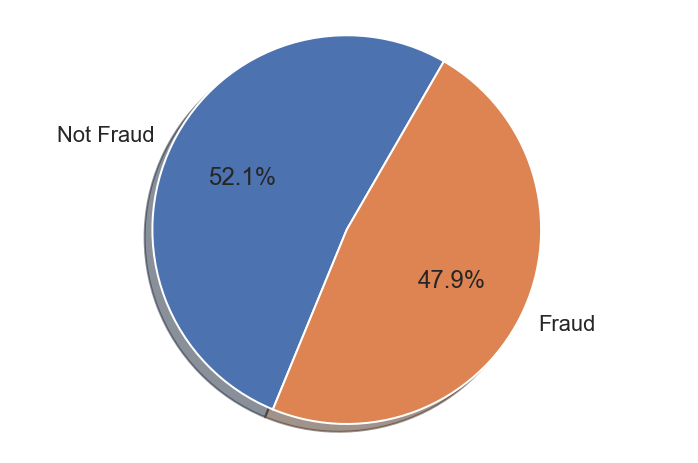

In [26]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y_somteenn.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_somteenn, y_somteenn, test_size = 0.10, random_state = 31)

In [48]:
len(x_train), len(x_test), len(y_train), len(y_test)

(17937, 1993, 17937, 1993)

In [49]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.5800301053687907

In [50]:
from sklearn.metrics import classification_report
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.54      0.73      0.62       950
           1       0.64      0.44      0.52      1043

    accuracy                           0.58      1993
   macro avg       0.59      0.59      0.57      1993
weighted avg       0.60      0.58      0.57      1993



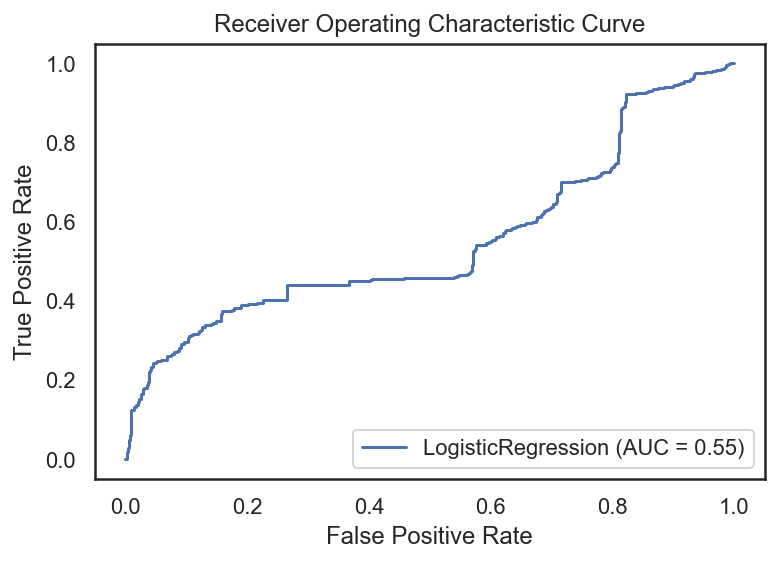

In [51]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

In [167]:
## applying other models
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []

models.append(("Random Forest Classifier: ", RandomForestClassifier()))
models.append(("Decision Tree Classifier: ", DecisionTreeClassifier()))
models.append(("AdaBoost Classifier: " , AdaBoostClassifier()))
models.append(("Gradient Boosting Classifier: ", GradientBoostingClassifier()))
models.append(("Logistic Regression: ", LogisticRegression()))

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)
X = data.iloc[:,1:]
y = data["fraud_YN"]

In [157]:
sme = SMOTEENN(random_state=42)
X_somteenn, y_somteenn = sme.fit_resample(X, y)

In [158]:
x_train,x_test,y_train,y_test = train_test_split(X_somteenn, y_somteenn, test_size = 0.10, random_state = 31)

In [168]:
from sklearn.model_selection import KFold, cross_val_score


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, x_test, y_test,
                                cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    model = model.fit(x_train, y_train)
    y_preds = model.predict(x_test)

    print(name, cv_results.mean(), cv_results.std())
    print(classification_report(y_test, y_preds))    

Random Forest Classifier:  0.9791563275434243 0.0051094938664947576
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       959
           1       1.00      0.99      1.00      1056

    accuracy                           1.00      2015
   macro avg       1.00      1.00      1.00      2015
weighted avg       1.00      1.00      1.00      2015

Decision Tree Classifier:  0.9543424317617866 0.012115687956063213
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       959
           1       0.99      1.00      0.99      1056

    accuracy                           0.99      2015
   macro avg       0.99      0.99      0.99      2015
weighted avg       0.99      0.99      0.99      2015

AdaBoost Classifier:  0.9310173697270473 0.014587531966946983
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       959
           1       0.93      0.95      0

In [ ]:
# Random Forest Classifier using SOTEENN

In [184]:
rfc = RandomForestClassifier(random_state = 4)
rfc.fit(x_train, y_train)
log_score = rfc.score(x_test, y_test)
y_preds = rfc.predict(x_test)
print(classification_report(y_test, y_preds))
log_score

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       959
           1       1.00      0.99      1.00      1056

    accuracy                           1.00      2015
   macro avg       1.00      1.00      1.00      2015
weighted avg       1.00      1.00      1.00      2015



0.996029776674938

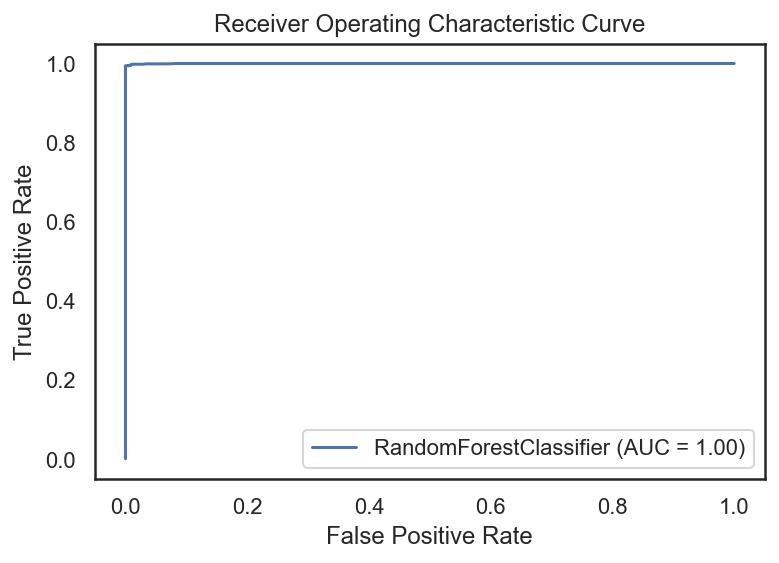

In [185]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
# 완벽...?  ㅜㅅㅜ 

In [129]:
# Logistic Classifier 
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.54      0.82      0.65      1570
           1       0.64      0.32      0.43      1621

    accuracy                           0.56      3191
   macro avg       0.59      0.57      0.54      3191
weighted avg       0.59      0.56      0.53      3191



In [ ]:
# 만들어보기 

In [138]:
# Gradient Boosting Classifier 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)

print('Acc : ', accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Acc :  0.9729051680883091
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       950
           1       0.96      0.98      0.97      1043

    accuracy                           0.97      1993
   macro avg       0.97      0.97      0.97      1993
weighted avg       0.97      0.97      0.97      1993



In [59]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimator=400)
evals = [(x_test, y_test)]
lgbm.fit(x_train.values, y_train, early_stopping_rounds=100, eval_set=evals)

[1]	valid_0's binary_logloss: 0.624897
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.566117
[3]	valid_0's binary_logloss: 0.513648
[4]	valid_0's binary_logloss: 0.463123
[5]	valid_0's binary_logloss: 0.427076
[6]	valid_0's binary_logloss: 0.389061
[7]	valid_0's binary_logloss: 0.357103
[8]	valid_0's binary_logloss: 0.327658
[9]	valid_0's binary_logloss: 0.301834
[10]	valid_0's binary_logloss: 0.280913
[11]	valid_0's binary_logloss: 0.260152
[12]	valid_0's binary_logloss: 0.242537
[13]	valid_0's binary_logloss: 0.226382
[14]	valid_0's binary_logloss: 0.213692
[15]	valid_0's binary_logloss: 0.200672
[16]	valid_0's binary_logloss: 0.187691
[17]	valid_0's binary_logloss: 0.176802
[18]	valid_0's binary_logloss: 0.168095
[19]	valid_0's binary_logloss: 0.158528
[20]	valid_0's binary_logloss: 0.149618
[21]	valid_0's binary_logloss: 0.142942
[22]	valid_0's binary_logloss: 0.135137
[23]	valid_0's binary_logloss: 0.128303
[24]	valid_0's binary_loglo

LGBMClassifier(n_estimator=400)

### ADASYN(Adaptive Synthetic Sampling) 
#방법은 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 
#직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

In [71]:
from imblearn.over_sampling import ADASYN

In [96]:
X = data.iloc[:,1:]
y = data["fraud_YN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [97]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

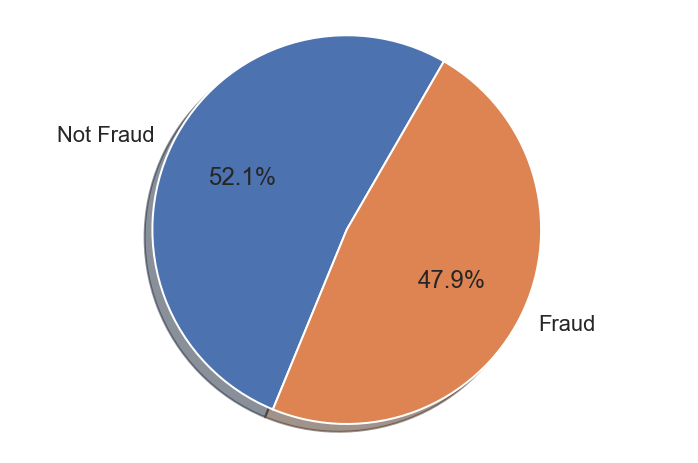

In [98]:
labels = 'Not Fraud', 'Fraud'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y_somteenn.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_adasyn, y_adasyn, test_size = 0.10, random_state = 31)

In [100]:
len(x_train), len(x_test), len(y_train), len(y_test)

(28717, 3191, 28717, 3191)

In [101]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.563146349106863

In [102]:
from sklearn.metrics import classification_report
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.54      0.82      0.65      1570
           1       0.64      0.32      0.43      1621

    accuracy                           0.56      3191
   macro avg       0.59      0.57      0.54      3191
weighted avg       0.59      0.56      0.53      3191



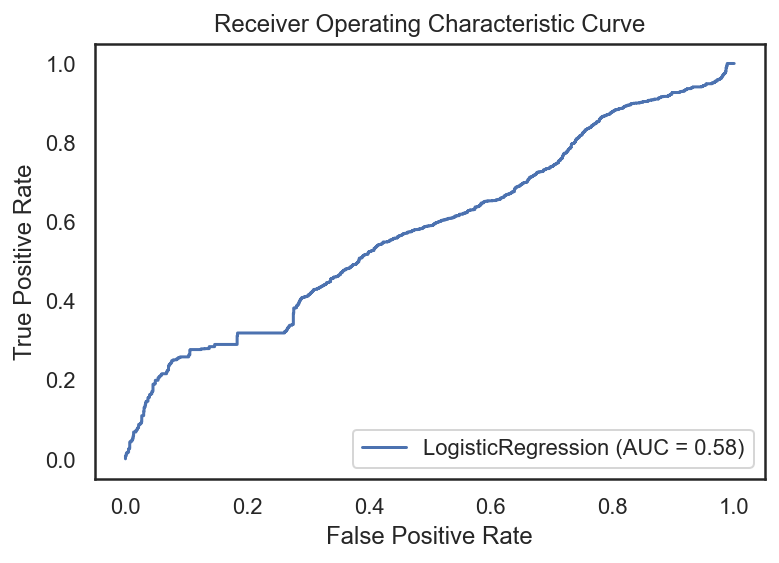

In [103]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

In [104]:
## applying other models
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []

models.append(("Random Forest Classifier: ", RandomForestClassifier()))
models.append(("Decision Tree Classifier: ", DecisionTreeClassifier()))
models.append(("AdaBoost Classifier: " , AdaBoostClassifier()))
models.append(("Gradient Boosting Classifier: ", GradientBoostingClassifier()))
models.append(("Logistic Regression: ", LogisticRegression()))

In [105]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train,
                                cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print(name, cv_results.mean(), cv_results.std())


Random Forest Classifier:  0.9980847702689528 0.0002461385432306775
Decision Tree Classifier:  0.9911899711262881 0.0013144357901662585
AdaBoost Classifier:  0.9151722976790928 0.004149267028185112
Gradient Boosting Classifier:  0.9605809567369649 0.004193100913146149
Logistic Regression:  0.5549679529930346 0.007114579183603815


# Tomek’s link method¶
- https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html#ramdom-under-sampler